# Pandas 从基础到进阶的详细使用案例

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## 1. Pandas基础操作

In [2]:
# Series创建和基本操作
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print("Series:")
print(s)
print("Series类型:", type(s))
print("Series索引:", s.index)
print("Series值:", s.values)
print("Series描述统计:", s.describe())

Series:
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
Series类型: <class 'pandas.core.series.Series'>
Series索引: RangeIndex(start=0, stop=6, step=1)
Series值: [ 1.  3.  5. nan  6.  8.]
Series描述统计: count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64


In [3]:
# DataFrame创建
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': pd.Timestamp('20230101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
print("\nDataFrame:")
print(df)
print("DataFrame数据类型:")
print(df.dtypes)
print("DataFrame形状:", df.shape)
print("DataFrame信息:")
print(df.info())


DataFrame:
   A          B    C  D      E    F
0  1 2023-01-01  1.0  3   test  foo
1  2 2023-01-01  1.0  3  train  foo
2  3 2023-01-01  1.0  3   test  foo
3  4 2023-01-01  1.0  3  train  foo
DataFrame数据类型:
A            int64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object
DataFrame形状: (4, 6)
DataFrame信息:
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   A       4 non-null      int64        
 1   B       4 non-null      datetime64[s]
 2   C       4 non-null      float32      
 3   D       4 non-null      int32        
 4   E       4 non-null      category     
 5   F       4 non-null      object       
dtypes: category(1), datetime64[s](1), float32(1), int32(1), int64(1), object(1)
memory usage: 288.0+ bytes
None


## 2. 数据读取和写入

In [4]:
# 创建示例数据
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'City': ['New York', 'London', 'Tokyo', 'Paris', 'Sydney'],
    'Salary': [50000, 60000, 70000, 55000, 65000]
}
df_sample = pd.DataFrame(data)
print("示例数据:")
print(df_sample)

# 保存为CSV
df_sample.to_csv('/tmp/sample_data.csv', index=False)
print("数据已保存为CSV文件")

# 从CSV读取
df_read = pd.read_csv('/tmp/sample_data.csv')
print("从CSV读取的数据:")
print(df_read.head())

示例数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
3    David   28     Paris   55000
4      Eve   32    Sydney   65000
数据已保存为CSV文件
从CSV读取的数据:
      Name  Age      City  Salary
0    Alice   25  New York   50000
1      Bob   30    London   60000
2  Charlie   35     Tokyo   70000
3    David   28     Paris   55000
4      Eve   32    Sydney   65000


## 3. 数据选择和索引

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), 
                  index=pd.date_range('20230101', periods=6),
                  columns=list('ABCD'))
print("原始数据:")
print(df)

# 选择列
print("\n选择列A:")
print(df['A'])
print("\n选择多列:")
print(df[['A', 'C']])

# 选择行
print("\n选择前3行:")
print(df[0:3])
print("\n按标签选择:")
print(df.loc['2023-01-02':'2023-01-04', ['A', 'B']])
print("\n按位置选择:")
print(df.iloc[3:5, 0:2])

# 布尔索引
print("\n布尔索引(A列大于0):")
print(df[df.A > 0])
print("\n多条件筛选:")
print(df[(df.A > 0) & (df.B < 0)])

原始数据:
                   A         B         C         D
2023-01-01  0.811937  1.382129 -0.458692  0.250370
2023-01-02 -0.124542 -1.532981 -0.471101 -1.797905
2023-01-03  0.342414  0.744138 -1.674813  0.015059
2023-01-04  0.655752  0.825130  0.072174  0.414027
2023-01-05 -0.759593 -0.808303 -0.432388 -1.041269
2023-01-06 -0.226249  0.414288  0.362685 -0.703399

选择列A:
2023-01-01    0.811937
2023-01-02   -0.124542
2023-01-03    0.342414
2023-01-04    0.655752
2023-01-05   -0.759593
2023-01-06   -0.226249
Freq: D, Name: A, dtype: float64

选择多列:
                   A         C
2023-01-01  0.811937 -0.458692
2023-01-02 -0.124542 -0.471101
2023-01-03  0.342414 -1.674813
2023-01-04  0.655752  0.072174
2023-01-05 -0.759593 -0.432388
2023-01-06 -0.226249  0.362685

选择前3行:
                   A         B         C         D
2023-01-01  0.811937  1.382129 -0.458692  0.250370
2023-01-02 -0.124542 -1.532981 -0.471101 -1.797905
2023-01-03  0.342414  0.744138 -1.674813  0.015059

按标签选择:
               

## 4. 数据清洗

In [6]:
# 创建包含缺失值的数据
df_dirty = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, 2, 3, np.nan, 5],
    'D': ['a', 'b', 'c', 'd', 'e']
})
print("包含缺失值的数据:")
print(df_dirty)
print("\n缺失值统计:")
print(df_dirty.isnull().sum())

# 删除缺失值
print("\n删除包含缺失值的行:")
print(df_dirty.dropna())
print("\n删除包含缺失值的列:")
print(df_dirty.dropna(axis=1))

# 填充缺失值
print("\n用0填充缺失值:")
print(df_dirty.fillna(0))
print("\n用前一个值填充:")
print(df_dirty.fillna(method='ffill'))
print("\n用均值填充数值列:")
df_filled = df_dirty.copy()
for col in df_filled.select_dtypes(include=[np.number]).columns:
    df_filled[col].fillna(df_filled[col].mean(), inplace=True)
print(df_filled)

# 重复值处理
df_dup = pd.DataFrame({
    'A': [1, 2, 2, 3, 3],
    'B': [1, 2, 2, 3, 4]
})
print("\n包含重复值的数据:")
print(df_dup)
print("\n检查重复值:")
print(df_dup.duplicated())
print("\n删除重复值:")
print(df_dup.drop_duplicates())

包含缺失值的数据:
     A    B    C  D
0  1.0  NaN  1.0  a
1  2.0  2.0  2.0  b
2  NaN  3.0  3.0  c
3  4.0  4.0  NaN  d
4  5.0  5.0  5.0  e

缺失值统计:
A    1
B    1
C    1
D    0
dtype: int64

删除包含缺失值的行:
     A    B    C  D
1  2.0  2.0  2.0  b
4  5.0  5.0  5.0  e

删除包含缺失值的列:
   D
0  a
1  b
2  c
3  d
4  e

用0填充缺失值:
     A    B    C  D
0  1.0  0.0  1.0  a
1  2.0  2.0  2.0  b
2  0.0  3.0  3.0  c
3  4.0  4.0  0.0  d
4  5.0  5.0  5.0  e

用前一个值填充:
     A    B    C  D
0  1.0  NaN  1.0  a
1  2.0  2.0  2.0  b
2  2.0  3.0  3.0  c
3  4.0  4.0  3.0  d
4  5.0  5.0  5.0  e

用均值填充数值列:
     A    B     C  D
0  1.0  3.5  1.00  a
1  2.0  2.0  2.00  b
2  3.0  3.0  3.00  c
3  4.0  4.0  2.75  d
4  5.0  5.0  5.00  e

包含重复值的数据:
   A  B
0  1  1
1  2  2
2  2  2
3  3  3
4  3  4

检查重复值:
0    False
1    False
2     True
3    False
4    False
dtype: bool

删除重复值:
   A  B
0  1  1
1  2  2
3  3  3
4  3  4


/var/folders/cc/_fp3lvjs5yj560jjt4vv9v9w0000gn/T/ipykernel_49679/28308970.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df_dirty.fillna(method='ffill'))


## 5. 数据变换

In [7]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': ['a', 'b', 'c', 'd', 'e']
})
print("原始数据:")
print(df)

# 应用函数
print("\n对A列应用平方函数:")
print(df['A'].apply(lambda x: x**2))
print("\n对数值列应用函数:")
print(df[['A', 'B']].apply(np.sqrt))

# 字符串操作
df_str = pd.DataFrame({
    'names': ['Alice Smith', 'Bob Johnson', 'Charlie Brown'],
    'emails': ['alice@email.com', 'bob@email.com', 'charlie@email.com']
})
print("\n字符串数据:")
print(df_str)
print("\n提取姓氏:")
print(df_str['names'].str.split().str[1])
print("\n转换为大写:")
print(df_str['names'].str.upper())
print("\n检查是否包含特定字符:")
print(df_str['emails'].str.contains('alice'))

原始数据:
   A   B  C
0  1  10  a
1  2  20  b
2  3  30  c
3  4  40  d
4  5  50  e

对A列应用平方函数:
0     1
1     4
2     9
3    16
4    25
Name: A, dtype: int64

对数值列应用函数:
          A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226
3  2.000000  6.324555
4  2.236068  7.071068

字符串数据:
           names             emails
0    Alice Smith    alice@email.com
1    Bob Johnson      bob@email.com
2  Charlie Brown  charlie@email.com

提取姓氏:
0      Smith
1    Johnson
2      Brown
Name: names, dtype: object

转换为大写:
0      ALICE SMITH
1      BOB JOHNSON
2    CHARLIE BROWN
Name: names, dtype: object

检查是否包含特定字符:
0     True
1    False
2    False
Name: emails, dtype: bool


## 6. 分组操作

In [8]:
df_group = pd.DataFrame({
    'Department': ['Sales', 'Sales', 'Marketing', 'Marketing', 'IT', 'IT'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Salary': [50000, 55000, 60000, 58000, 70000, 72000],
    'Experience': [2, 3, 5, 4, 6, 7]
})
print("员工数据:")
print(df_group)

# 按部门分组
print("\n按部门分组统计:")
print(df_group.groupby('Department').agg({
    'Salary': ['mean', 'sum', 'count'],
    'Experience': 'mean'
}))

# 多重分组
df_multi = pd.DataFrame({
    'Department': ['Sales', 'Sales', 'Marketing', 'Marketing', 'IT', 'IT'],
    'Level': ['Junior', 'Senior', 'Junior', 'Senior', 'Junior', 'Senior'],
    'Salary': [45000, 65000, 50000, 70000, 60000, 80000]
})
print("\n多重分组:")
print(df_multi.groupby(['Department', 'Level'])['Salary'].mean())

员工数据:
  Department Employee  Salary  Experience
0      Sales    Alice   50000           2
1      Sales      Bob   55000           3
2  Marketing  Charlie   60000           5
3  Marketing    David   58000           4
4         IT      Eve   70000           6
5         IT    Frank   72000           7

按部门分组统计:
             Salary               Experience
               mean     sum count       mean
Department                                  
IT          71000.0  142000     2        6.5
Marketing   59000.0  118000     2        4.5
Sales       52500.0  105000     2        2.5

多重分组:
Department  Level 
IT          Junior    60000.0
            Senior    80000.0
Marketing   Junior    50000.0
            Senior    70000.0
Sales       Junior    45000.0
            Senior    65000.0
Name: Salary, dtype: float64


## 7. 数据合并

In [9]:
# 创建示例数据
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 28]
})
df2 = pd.DataFrame({
    'ID': [1, 2, 3, 5],
    'Department': ['Sales', 'Marketing', 'IT', 'HR'],
    'Salary': [50000, 60000, 70000, 55000]
})
print("数据表1:")
print(df1)
print("\n数据表2:")
print(df2)

# 内连接
print("\n内连接:")
print(pd.merge(df1, df2, on='ID', how='inner'))

# 左连接
print("\n左连接:")
print(pd.merge(df1, df2, on='ID', how='left'))

# 外连接
print("\n外连接:")
print(pd.merge(df1, df2, on='ID', how='outer'))

# 拼接
df3 = pd.DataFrame({
    'ID': [6, 7],
    'Name': ['Eve', 'Frank'],
    'Age': [32, 29]
})
print("\n垂直拼接:")
print(pd.concat([df1, df3], ignore_index=True))

数据表1:
   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   28

数据表2:
   ID Department  Salary
0   1      Sales   50000
1   2  Marketing   60000
2   3         IT   70000
3   5         HR   55000

内连接:
   ID     Name  Age Department  Salary
0   1    Alice   25      Sales   50000
1   2      Bob   30  Marketing   60000
2   3  Charlie   35         IT   70000

左连接:
   ID     Name  Age Department   Salary
0   1    Alice   25      Sales  50000.0
1   2      Bob   30  Marketing  60000.0
2   3  Charlie   35         IT  70000.0
3   4    David   28        NaN      NaN

外连接:
   ID     Name   Age Department   Salary
0   1    Alice  25.0      Sales  50000.0
1   2      Bob  30.0  Marketing  60000.0
2   3  Charlie  35.0         IT  70000.0
3   4    David  28.0        NaN      NaN
4   5      NaN   NaN         HR  55000.0

垂直拼接:
   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   28
4   6      Eve   32
5   7    Frank 

## 8. 透视表

In [10]:
df_pivot = pd.DataFrame({
    'Date': pd.date_range('2023-01-01', periods=12, freq='M'),
    'Product': ['A', 'B', 'A', 'B'] * 3,
    'Region': ['North', 'North', 'South', 'South'] * 3,
    'Sales': [100, 150, 120, 180, 110, 160, 130, 190, 105, 155, 125, 185]
})
print("销售数据:")
print(df_pivot)

# 创建透视表
print("\n透视表:")
pivot_table = df_pivot.pivot_table(
    values='Sales',
    index='Product',
    columns='Region',
    aggfunc='mean'
)
print(pivot_table)

# 交叉表
print("\n交叉表:")
print(pd.crosstab(df_pivot['Product'], df_pivot['Region'], values=df_pivot['Sales'], aggfunc='sum'))

销售数据:
         Date Product Region  Sales
0  2023-01-31       A  North    100
1  2023-02-28       B  North    150
2  2023-03-31       A  South    120
3  2023-04-30       B  South    180
4  2023-05-31       A  North    110
5  2023-06-30       B  North    160
6  2023-07-31       A  South    130
7  2023-08-31       B  South    190
8  2023-09-30       A  North    105
9  2023-10-31       B  North    155
10 2023-11-30       A  South    125
11 2023-12-31       B  South    185

透视表:
Region   North  South
Product              
A        105.0  125.0
B        155.0  185.0

交叉表:
Region   North  South
Product              
A          315    375
B          465    555


## 9. 时间序列

In [11]:
# 创建时间序列数据
dates = pd.date_range('2023-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(100), index=dates)
print("时间序列数据(前10个):")
print(ts.head(10))

# 时间索引操作
print("\n2023年1月的数据:")
print(ts['2023-01'].head())
print("\n按月重采样(求均值):")
print(ts.resample('M').mean())

# 滚动窗口
print("\n7天滚动平均:")
print(ts.rolling(window=7).mean().head(10))

# 时间偏移
print("\n向前偏移3天:")
print(ts.shift(3).head(10))

时间序列数据(前10个):
2023-01-01    0.633043
2023-01-02   -1.205793
2023-01-03   -0.186307
2023-01-04   -0.925950
2023-01-05   -0.296575
2023-01-06    0.765089
2023-01-07    0.537569
2023-01-08    1.922644
2023-01-09   -0.092435
2023-01-10    0.125457
Freq: D, dtype: float64

2023年1月的数据:
2023-01-01    0.633043
2023-01-02   -1.205793
2023-01-03   -0.186307
2023-01-04   -0.925950
2023-01-05   -0.296575
Freq: D, dtype: float64

按月重采样(求均值):
2023-01-31    0.132853
2023-02-28    0.178117
2023-03-31   -0.363340
2023-04-30   -0.755475
Freq: M, dtype: float64

7天滚动平均:
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06         NaN
2023-01-07   -0.096989
2023-01-08    0.087240
2023-01-09    0.246291
2023-01-10    0.290828
Freq: D, dtype: float64

向前偏移3天:
2023-01-01         NaN
2023-01-02         NaN
2023-01-03         NaN
2023-01-04    0.633043
2023-01-05   -1.205793
2023-01-06   -0.186307
2023-01-07   -0.925950
2023-01-08   -0.29

## 10. 数据可视化基础

绘图数据:
   x        y1        y2
0  0 -0.696051  1.936907
1  1 -0.521892  2.390199
2  2 -0.189325  4.493946
3  3  1.391588  4.314372
4  4  0.752769  3.290980
5  5  0.060365  4.573363
6  6 -0.709191  4.987634
7  7 -2.065804  6.094666
8  8 -2.307299  6.119528
9  9 -3.298396  6.807911


/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


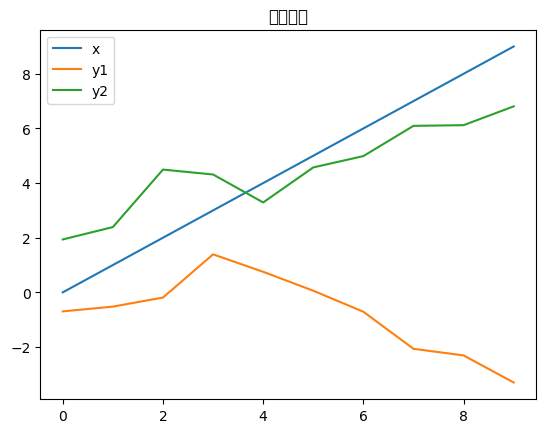

/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26609 (\N{CJK UNIFIED IDEOGRAPH-67F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29366 (\N{CJK UNIFIED IDEOGRAPH-72B6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIF

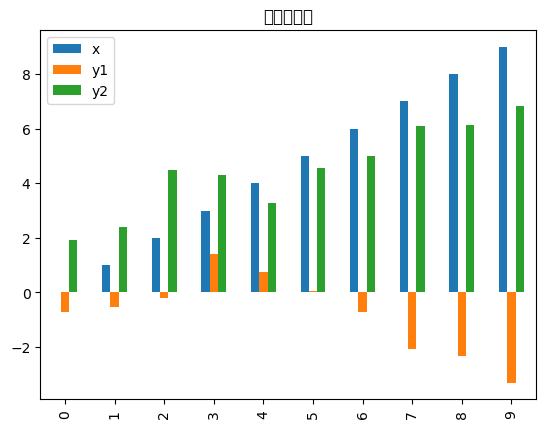

/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIF

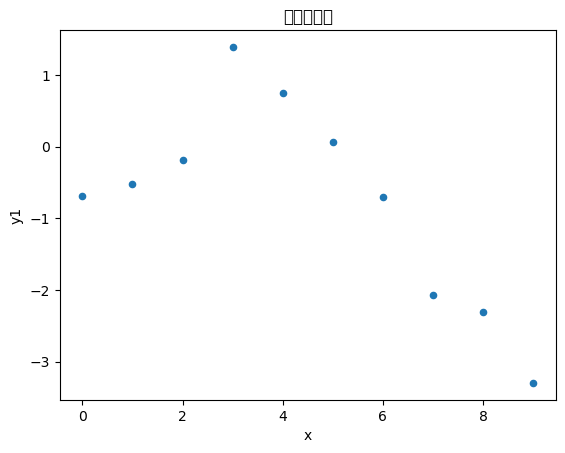

/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xtq/anaconda3/envs/uni/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


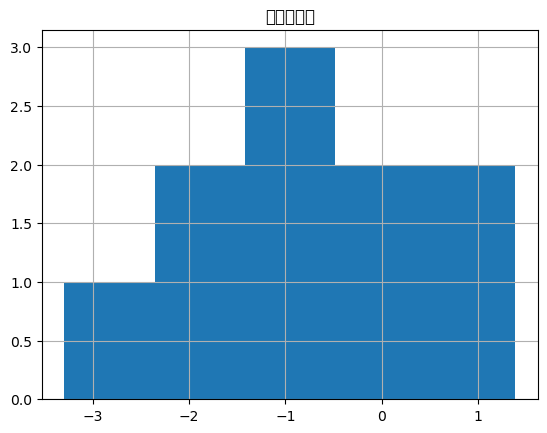

In [12]:
# 创建示例数据
df_plot = pd.DataFrame({
    'x': range(10),
    'y1': np.random.randn(10).cumsum(),
    'y2': np.random.randn(10).cumsum()
})
print("绘图数据:")
print(df_plot)

# 注意：实际绘图需要在支持图形显示的环境中运行
# df_plot.plot()  # 线图
# df_plot.plot(kind='bar')  # 柱状图
# df_plot.plot(kind='scatter', x='x', y='y1')  # 散点图
# df_plot['y1'].hist()  # 直方图

# 为了在notebook中显示，我们添加一个简单的绘图示例
df_plot.plot(title='示例线图')
plt.show()

df_plot.plot(kind='bar', title='示例柱状图')
plt.show()

df_plot.plot(kind='scatter', x='x', y='y1', title='示例散点图')
plt.show()

df_plot['y1'].hist(bins=5)
plt.title('示例直方图')
plt.show()

## 11. 高级索引

In [13]:
# 多级索引
arrays = [['A', 'A', 'B', 'B'], ['one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df_multi_index = pd.DataFrame(np.random.randn(4, 2), index=index, columns=['X', 'Y'])
print("多级索引DataFrame:")
print(df_multi_index)

# 多级索引操作
print("\n选择A级别的数据:")
print(df_multi_index.loc['A'])
print("\n交换索引级别:")
print(df_multi_index.swaplevel(0, 1))
print("\n按级别排序:")
print(df_multi_index.sort_index(level=1))

多级索引DataFrame:
                     X         Y
first second                    
A     one    -0.113121  0.491103
      two     0.740081 -1.017043
B     one     2.647916 -1.670777
      two    -0.540132 -0.293017

选择A级别的数据:
               X         Y
second                    
one    -0.113121  0.491103
two     0.740081 -1.017043

交换索引级别:
                     X         Y
second first                    
one    A     -0.113121  0.491103
two    A      0.740081 -1.017043
one    B      2.647916 -1.670777
two    B     -0.540132 -0.293017

按级别排序:
                     X         Y
first second                    
A     one    -0.113121  0.491103
B     one     2.647916 -1.670777
A     two     0.740081 -1.017043
B     two    -0.540132 -0.293017


## 12. 性能优化

In [14]:
# 数据类型优化
df_optimize = pd.DataFrame({
    'int_col': [1, 2, 3, 4, 5],
    'float_col': [1.1, 2.2, 3.3, 4.4, 5.5],
    'str_col': ['a', 'b', 'c', 'd', 'e']
})
print("原始数据类型:")
print(df_optimize.dtypes)
print("内存使用:")
print(df_optimize.memory_usage(deep=True))

# 优化数据类型
df_optimize['int_col'] = df_optimize['int_col'].astype('int8')
df_optimize['str_col'] = df_optimize['str_col'].astype('category')
print("\n优化后数据类型:")
print(df_optimize.dtypes)
print("优化后内存使用:")
print(df_optimize.memory_usage(deep=True))

# 使用query方法
df_query = pd.DataFrame({
    'A': range(100),
    'B': np.random.randn(100),
    'C': np.random.choice(['X', 'Y', 'Z'], 100)
})
print("\n使用query方法筛选:")
result = df_query.query('A > 50 and B > 0 and C == "X"')
print(f"筛选结果数量: {len(result)}")

原始数据类型:
int_col        int64
float_col    float64
str_col       object
dtype: object
内存使用:
Index        132
int_col       40
float_col     40
str_col      290
dtype: int64

优化后数据类型:
int_col          int8
float_col     float64
str_col      category
dtype: object
优化后内存使用:
Index        132
int_col        5
float_col     40
str_col      467
dtype: int64

使用query方法筛选:
筛选结果数量: 9


## 13. 数据导入导出进阶

In [15]:
# 创建复杂数据
complex_data = pd.DataFrame({
    'date': pd.date_range('2023-01-01', periods=5),
    'category': pd.Categorical(['A', 'B', 'A', 'C', 'B']),
    'value': [1.1, 2.2, 3.3, 4.4, 5.5],
    'description': ['First', 'Second', 'Third', 'Fourth', 'Fifth']
})
print("复杂数据:")
print(complex_data)
print("数据类型:")
print(complex_data.dtypes)

# 保存为不同格式
complex_data.to_json('/tmp/complex_data.json', orient='records', date_format='iso')
complex_data.to_pickle('/tmp/complex_data.pkl')
print("数据已保存为JSON和Pickle格式")

# 从不同格式读取
df_from_json = pd.read_json('/tmp/complex_data.json')
df_from_pickle = pd.read_pickle('/tmp/complex_data.pkl')
print("\n从JSON读取的数据类型:")
print(df_from_json.dtypes)
print("\n从Pickle读取的数据类型:")
print(df_from_pickle.dtypes)

复杂数据:
        date category  value description
0 2023-01-01        A    1.1       First
1 2023-01-02        B    2.2      Second
2 2023-01-03        A    3.3       Third
3 2023-01-04        C    4.4      Fourth
4 2023-01-05        B    5.5       Fifth
数据类型:
date           datetime64[ns]
category             category
value                 float64
description            object
dtype: object
数据已保存为JSON和Pickle格式

从JSON读取的数据类型:
date           datetime64[ns]
category               object
value                 float64
description            object
dtype: object

从Pickle读取的数据类型:
date           datetime64[ns]
category             category
value                 float64
description            object
dtype: object


## 14. 数据验证和质量检查

In [16]:
validation_data = pd.DataFrame({
    'age': [25, 30, -5, 150, 35],
    'salary': [50000, 60000, 70000, -10000, 80000],
    'email': ['valid@email.com', 'invalid-email', 'another@valid.com', '', 'test@test.com']
})
print("待验证数据:")
print(validation_data)

# 数据范围检查
print("\n年龄异常值检查:")
age_outliers = validation_data[(validation_data['age'] < 0) | (validation_data['age'] > 120)]
print(age_outliers)

# 数据格式检查
print("\n邮箱格式检查:")
email_pattern = r'^[\w\.-]+@[\w\.-]+\.w+$'
valid_emails = validation_data['email'].str.match(email_pattern, na=False)
print("有效邮箱:", validation_data[valid_emails]['email'].tolist())
print("无效邮箱:", validation_data[~valid_emails]['email'].tolist())

待验证数据:
   age  salary              email
0   25   50000    valid@email.com
1   30   60000      invalid-email
2   -5   70000  another@valid.com
3  150  -10000                   
4   35   80000      test@test.com

年龄异常值检查:
   age  salary              email
2   -5   70000  another@valid.com
3  150  -10000                   

邮箱格式检查:
有效邮箱: []
无效邮箱: ['valid@email.com', 'invalid-email', 'another@valid.com', '', 'test@test.com']


## 15. 高级数据操作

In [17]:
# 数据透视和逆透视
wide_data = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [90, 85, 92],
    'Science': [88, 90, 87],
    'English': [85, 88, 90]
})
print("宽格式数据:")
print(wide_data)

# 宽格式转长格式
long_data = pd.melt(wide_data, 
                   id_vars=['ID', 'Name'], 
                   value_vars=['Math', 'Science', 'English'],
                   var_name='Subject', 
                   value_name='Score')
print("\n长格式数据:")
print(long_data)

# 长格式转宽格式
wide_again = long_data.pivot(index=['ID', 'Name'], columns='Subject', values='Score')
print("\n重新转换为宽格式:")
print(wide_again)

# 数据分箱
scores = pd.Series([45, 67, 89, 92, 78, 56, 34, 88, 91, 76])
print("\n原始分数:")
print(scores)

# 等宽分箱
bins_equal = pd.cut(scores, bins=3, labels=['低', '中', '高'])
print("\n等宽分箱:")
print(bins_equal)

# 等频分箱
bins_quantile = pd.qcut(scores, q=3, labels=['下', '中', '上'])
print("\n等频分箱:")
print(bins_quantile)

宽格式数据:
   ID     Name  Math  Science  English
0   1    Alice    90       88       85
1   2      Bob    85       90       88
2   3  Charlie    92       87       90

长格式数据:
   ID     Name  Subject  Score
0   1    Alice     Math     90
1   2      Bob     Math     85
2   3  Charlie     Math     92
3   1    Alice  Science     88
4   2      Bob  Science     90
5   3  Charlie  Science     87
6   1    Alice  English     85
7   2      Bob  English     88
8   3  Charlie  English     90

重新转换为宽格式:
Subject     English  Math  Science
ID Name                           
1  Alice         85    90       88
2  Bob           88    85       90
3  Charlie       90    92       87

原始分数:
0    45
1    67
2    89
3    92
4    78
5    56
6    34
7    88
8    91
9    76
dtype: int64

等宽分箱:
0    低
1    中
2    高
3    高
4    高
5    中
6    低
7    高
8    高
9    高
dtype: category
Categories (3, object): ['低' < '中' < '高']

等频分箱:
0    下
1    下
2    上
3    上
4    中
5    下
6    下
7    中
8    上
9    中
dtype: category
Categ

## Pandas学习示例完成

In [18]:
print("\n=== Pandas学习示例完成 ===")
print("本文件包含了Pandas从基础到进阶的15个主要模块:")
print("1. 基础操作 - Series和DataFrame创建")
print("2. 数据读写 - CSV等格式的导入导出")
print("3. 数据选择 - 各种索引和筛选方法")
print("4. 数据清洗 - 缺失值和重复值处理")
print("5. 数据变换 - 函数应用和字符串操作")
print("6. 分组操作 - groupby和聚合函数")
print("7. 数据合并 - merge和concat操作")
print("8. 透视表 - pivot_table和交叉表")
print("9. 时间序列 - 时间索引和重采样")
print("10. 数据可视化 - 基础绘图方法")
print("11. 高级索引 - 多级索引操作")
print("12. 性能优化 - 数据类型和查询优化")
print("13. 导入导出进阶 - 多种格式处理")
print("14. 数据验证 - 质量检查和异常检测")
print("15. 高级操作 - 数据透视和分箱")


=== Pandas学习示例完成 ===
本文件包含了Pandas从基础到进阶的15个主要模块:
1. 基础操作 - Series和DataFrame创建
2. 数据读写 - CSV等格式的导入导出
3. 数据选择 - 各种索引和筛选方法
4. 数据清洗 - 缺失值和重复值处理
5. 数据变换 - 函数应用和字符串操作
6. 分组操作 - groupby和聚合函数
7. 数据合并 - merge和concat操作
8. 透视表 - pivot_table和交叉表
9. 时间序列 - 时间索引和重采样
10. 数据可视化 - 基础绘图方法
11. 高级索引 - 多级索引操作
12. 性能优化 - 数据类型和查询优化
13. 导入导出进阶 - 多种格式处理
14. 数据验证 - 质量检查和异常检测
15. 高级操作 - 数据透视和分箱
